<a href="https://colab.research.google.com/github/nravinuthala/EVA4.0/blob/master/Assignment7/S7_Nagaraj_Work_modular.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Changes to be made
1. change the code such that it uses GPU -- Done
2. change the architecture to C1C2C3C40 (basically 3 MPs) -- Done
3. total RF must be more than 44 -- Done
4. one of the layers must use Depthwise Separable Convolution -- Done
5. one of the layers must use Dilated Convolution -- Done
6. use GAP (compulsory):- add FC after GAP to target #of classes (optional) -- Done
7. achieve 80% accuracy, as many epochs as you want. Total Params to be less than 1M. -- Done
8. upload to Github -- Done
9. Attempt S7-Assignment Solution -- Done

In [43]:
from google.colab import drive
import sys
%load_ext autoreload
%autoreload 2
drive.mount('/content/gdrive')
sys.path.append('/content/gdrive/My Drive/libs/EVA4_Assignment7_Libs')



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import cifar10_data_provider, my_model, my_trainer, my_tester

In [45]:
train, test, classes = cifar10_data_provider.download_data()
train_loader, test_loader = cifar10_data_provider.get_train_test_loaders(train, test)

Files already downloaded and verified
Files already downloaded and verified
CUDA Available? True


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


plane   dog  deer  deer


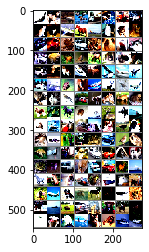

In [46]:
cifar10_data_provider.display(train_loader, classes)

In [47]:
import torch
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = my_model.Net().to(device)

cuda


In [48]:
!pip install torchsummary
from torchsummary import summary
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
       BatchNorm2d-2           [-1, 16, 32, 32]              32
              ReLU-3           [-1, 16, 32, 32]               0
           Dropout-4           [-1, 16, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]           4,608
       BatchNorm2d-6           [-1, 32, 32, 32]              64
              ReLU-7           [-1, 32, 32, 32]               0
           Dropout-8           [-1, 32, 32, 32]               0
         MaxPool2d-9           [-1, 32, 16, 16]               0
           Conv2d-10           [-1, 16, 16, 16]             512
      BatchNorm2d-11           [-1, 16, 16, 16]              32
             ReLU-12           [-1, 16, 16, 16]               0
          Dropout-13           [-1, 16, 16, 16]               0
           Conv2d-14           [-1, 32,

In [49]:
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
train_losses = []
test_losses = []
train_acc = []
test_acc = []
model =  my_model.Net().to(device)

optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = StepLR(optimizer, step_size=4, gamma=0.1)

EPOCHS = 50

my_trainer.run(model, device, train_loader, test_loader, optimizer, EPOCHS, train_losses, train_acc, test_losses, test_acc)

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 0


Loss=1.1924655437469482 Batch_id=390 Accuracy=38.83: 100%|██████████| 391/391 [00:13<00:00, 29.07it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.4969, Accuracy: 4765/10000 (47.65%)

EPOCH: 1


Loss=1.0933306217193604 Batch_id=390 Accuracy=55.89: 100%|██████████| 391/391 [00:13<00:00, 29.23it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.2977, Accuracy: 5467/10000 (54.67%)

EPOCH: 2


Loss=1.0198471546173096 Batch_id=390 Accuracy=61.34: 100%|██████████| 391/391 [00:13<00:00, 29.18it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.1245, Accuracy: 6022/10000 (60.22%)

EPOCH: 3


Loss=1.096619725227356 Batch_id=390 Accuracy=64.41: 100%|██████████| 391/391 [00:13<00:00, 29.26it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.3398, Accuracy: 5276/10000 (52.76%)

EPOCH: 4


Loss=1.0184099674224854 Batch_id=390 Accuracy=66.59: 100%|██████████| 391/391 [00:13<00:00, 29.84it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.0186, Accuracy: 6452/10000 (64.52%)

EPOCH: 5


Loss=0.9322492480278015 Batch_id=390 Accuracy=68.00: 100%|██████████| 391/391 [00:12<00:00, 30.26it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.1400, Accuracy: 6096/10000 (60.96%)

EPOCH: 6


Loss=0.8733841776847839 Batch_id=390 Accuracy=69.29: 100%|██████████| 391/391 [00:12<00:00, 30.28it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.9461, Accuracy: 6737/10000 (67.37%)

EPOCH: 7


Loss=0.7967891693115234 Batch_id=390 Accuracy=70.41: 100%|██████████| 391/391 [00:12<00:00, 30.25it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.9173, Accuracy: 6753/10000 (67.53%)

EPOCH: 8


Loss=0.9541922807693481 Batch_id=390 Accuracy=71.69: 100%|██████████| 391/391 [00:12<00:00, 30.47it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.8536, Accuracy: 6991/10000 (69.91%)

EPOCH: 9


Loss=0.9080032110214233 Batch_id=390 Accuracy=72.26: 100%|██████████| 391/391 [00:12<00:00, 30.40it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.8329, Accuracy: 7073/10000 (70.73%)

EPOCH: 10


Loss=0.6468203067779541 Batch_id=390 Accuracy=73.13: 100%|██████████| 391/391 [00:12<00:00, 31.70it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.8972, Accuracy: 6894/10000 (68.94%)

EPOCH: 11


Loss=0.7363928556442261 Batch_id=390 Accuracy=73.92: 100%|██████████| 391/391 [00:12<00:00, 36.83it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.8140, Accuracy: 7153/10000 (71.53%)

EPOCH: 12


Loss=0.8691883087158203 Batch_id=390 Accuracy=74.39: 100%|██████████| 391/391 [00:12<00:00, 31.40it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6973, Accuracy: 7535/10000 (75.35%)

EPOCH: 13


Loss=0.6752616167068481 Batch_id=390 Accuracy=75.21: 100%|██████████| 391/391 [00:12<00:00, 30.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7561, Accuracy: 7351/10000 (73.51%)

EPOCH: 14


Loss=0.6535456776618958 Batch_id=390 Accuracy=75.71: 100%|██████████| 391/391 [00:12<00:00, 31.62it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7244, Accuracy: 7495/10000 (74.95%)

EPOCH: 15


Loss=0.5911362767219543 Batch_id=390 Accuracy=76.41: 100%|██████████| 391/391 [00:12<00:00, 31.49it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7260, Accuracy: 7463/10000 (74.63%)

EPOCH: 16


Loss=0.6629572510719299 Batch_id=390 Accuracy=76.92: 100%|██████████| 391/391 [00:12<00:00, 31.55it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6747, Accuracy: 7681/10000 (76.81%)

EPOCH: 17


Loss=0.5233708024024963 Batch_id=390 Accuracy=77.17: 100%|██████████| 391/391 [00:12<00:00, 31.85it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6816, Accuracy: 7645/10000 (76.45%)

EPOCH: 18


Loss=0.6427510976791382 Batch_id=390 Accuracy=77.61: 100%|██████████| 391/391 [00:12<00:00, 32.05it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6668, Accuracy: 7685/10000 (76.85%)

EPOCH: 19


Loss=0.7280175089836121 Batch_id=390 Accuracy=77.84: 100%|██████████| 391/391 [00:12<00:00, 31.89it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6657, Accuracy: 7687/10000 (76.87%)

EPOCH: 20


Loss=0.7416032552719116 Batch_id=390 Accuracy=77.98: 100%|██████████| 391/391 [00:12<00:00, 32.58it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6623, Accuracy: 7716/10000 (77.16%)

EPOCH: 21


Loss=0.6492223143577576 Batch_id=390 Accuracy=78.57: 100%|██████████| 391/391 [00:12<00:00, 32.53it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6194, Accuracy: 7867/10000 (78.67%)

EPOCH: 22


Loss=0.6415205001831055 Batch_id=390 Accuracy=79.02: 100%|██████████| 391/391 [00:11<00:00, 32.62it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6684, Accuracy: 7703/10000 (77.03%)

EPOCH: 23


Loss=0.6486784219741821 Batch_id=390 Accuracy=79.16: 100%|██████████| 391/391 [00:11<00:00, 32.66it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5976, Accuracy: 7918/10000 (79.18%)

EPOCH: 24


Loss=0.5403054356575012 Batch_id=390 Accuracy=79.29: 100%|██████████| 391/391 [00:12<00:00, 38.73it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6343, Accuracy: 7833/10000 (78.33%)

EPOCH: 25


Loss=0.6630860567092896 Batch_id=390 Accuracy=79.41: 100%|██████████| 391/391 [00:11<00:00, 32.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5749, Accuracy: 8039/10000 (80.39%)

EPOCH: 26


Loss=0.5388768911361694 Batch_id=390 Accuracy=79.61: 100%|██████████| 391/391 [00:11<00:00, 32.77it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6061, Accuracy: 7901/10000 (79.01%)

EPOCH: 27


Loss=0.8092981576919556 Batch_id=390 Accuracy=79.89: 100%|██████████| 391/391 [00:11<00:00, 33.34it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5797, Accuracy: 8012/10000 (80.12%)

EPOCH: 28


Loss=0.6383777856826782 Batch_id=390 Accuracy=80.10: 100%|██████████| 391/391 [00:11<00:00, 38.79it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6476, Accuracy: 7787/10000 (77.87%)

EPOCH: 29


Loss=0.6362190246582031 Batch_id=390 Accuracy=80.16: 100%|██████████| 391/391 [00:11<00:00, 33.22it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5848, Accuracy: 7984/10000 (79.84%)

EPOCH: 30


Loss=0.5413929224014282 Batch_id=390 Accuracy=80.39: 100%|██████████| 391/391 [00:11<00:00, 32.61it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6083, Accuracy: 7921/10000 (79.21%)

EPOCH: 31


Loss=0.4403505325317383 Batch_id=390 Accuracy=80.47: 100%|██████████| 391/391 [00:11<00:00, 33.14it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5706, Accuracy: 7970/10000 (79.70%)

EPOCH: 32


Loss=0.765751302242279 Batch_id=390 Accuracy=80.53: 100%|██████████| 391/391 [00:11<00:00, 33.22it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5528, Accuracy: 8076/10000 (80.76%)

EPOCH: 33


Loss=0.5932835936546326 Batch_id=390 Accuracy=80.87: 100%|██████████| 391/391 [00:11<00:00, 33.03it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5517, Accuracy: 8108/10000 (81.08%)

EPOCH: 34


Loss=0.5057793259620667 Batch_id=390 Accuracy=80.97: 100%|██████████| 391/391 [00:11<00:00, 40.21it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6005, Accuracy: 7917/10000 (79.17%)

EPOCH: 35


Loss=0.6442686915397644 Batch_id=390 Accuracy=81.07: 100%|██████████| 391/391 [00:11<00:00, 40.32it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5937, Accuracy: 7927/10000 (79.27%)

EPOCH: 36


Loss=0.4855838418006897 Batch_id=390 Accuracy=81.16: 100%|██████████| 391/391 [00:12<00:00, 32.58it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5515, Accuracy: 8088/10000 (80.88%)

EPOCH: 37


Loss=0.3973906636238098 Batch_id=390 Accuracy=81.25: 100%|██████████| 391/391 [00:11<00:00, 33.19it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5538, Accuracy: 8037/10000 (80.37%)

EPOCH: 38


Loss=0.5885857343673706 Batch_id=390 Accuracy=81.45: 100%|██████████| 391/391 [00:12<00:00, 31.55it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5496, Accuracy: 8105/10000 (81.05%)

EPOCH: 39


Loss=0.4756876826286316 Batch_id=390 Accuracy=81.38: 100%|██████████| 391/391 [00:12<00:00, 32.19it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5337, Accuracy: 8159/10000 (81.59%)

EPOCH: 40


Loss=0.5694130659103394 Batch_id=390 Accuracy=81.54: 100%|██████████| 391/391 [00:12<00:00, 32.39it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5179, Accuracy: 8214/10000 (82.14%)

EPOCH: 41


Loss=0.3652750849723816 Batch_id=390 Accuracy=81.86: 100%|██████████| 391/391 [00:12<00:00, 31.66it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5592, Accuracy: 8045/10000 (80.45%)

EPOCH: 42


Loss=0.496163547039032 Batch_id=390 Accuracy=81.75: 100%|██████████| 391/391 [00:12<00:00, 32.04it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5082, Accuracy: 8269/10000 (82.69%)

EPOCH: 43


Loss=0.46633490920066833 Batch_id=390 Accuracy=82.04: 100%|██████████| 391/391 [00:12<00:00, 30.18it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5418, Accuracy: 8135/10000 (81.35%)

EPOCH: 44


Loss=0.61892169713974 Batch_id=390 Accuracy=82.08: 100%|██████████| 391/391 [00:12<00:00, 30.20it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5394, Accuracy: 8142/10000 (81.42%)

EPOCH: 45


Loss=0.656265139579773 Batch_id=390 Accuracy=82.06: 100%|██████████| 391/391 [00:12<00:00, 30.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5300, Accuracy: 8180/10000 (81.80%)

EPOCH: 46


Loss=0.6928182244300842 Batch_id=390 Accuracy=82.32: 100%|██████████| 391/391 [00:13<00:00, 29.64it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5290, Accuracy: 8212/10000 (82.12%)

EPOCH: 47


Loss=0.6592363715171814 Batch_id=390 Accuracy=82.41: 100%|██████████| 391/391 [00:13<00:00, 29.68it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5626, Accuracy: 8067/10000 (80.67%)

EPOCH: 48


Loss=0.350576788187027 Batch_id=390 Accuracy=82.21: 100%|██████████| 391/391 [00:12<00:00, 31.21it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5166, Accuracy: 8248/10000 (82.48%)

EPOCH: 49


Loss=0.4791486859321594 Batch_id=390 Accuracy=82.58: 100%|██████████| 391/391 [00:12<00:00, 31.36it/s]



Test set: Average loss: 0.5291, Accuracy: 8173/10000 (81.73%)



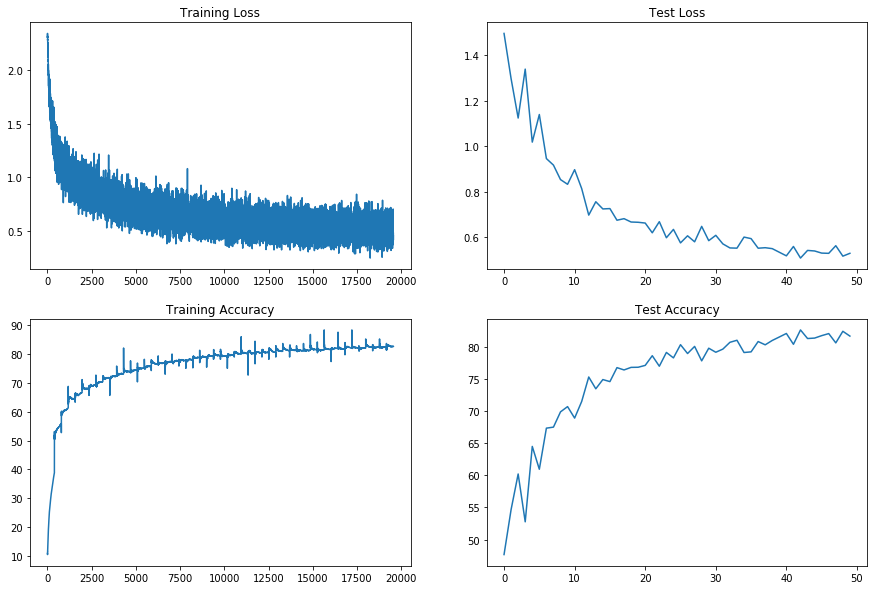

In [50]:
%matplotlib inline
my_trainer.plot(train_losses, train_acc, test_losses, test_acc)